# Business Understanding

It's important to undertand which factorts influence peoples' career satisfaction. One would assume that carrer satisfaction overall might be linked to the salary, but that are other factors that play a roile here?
This research has a goal to answer the following questios:
#### Question 1
What makes one be satisfied with own career? Does career satisfaction linked to a country where happiness is the highest (according to some other surveys, the happiest people live in Finland).
#### Question 2
Does career satisfaction correlate with the current job satisfaction and salary? Is salary (compared to the mean within an individual’s country) the leading factor for an individual’s career satisfaction (one would expect this is the case)?
#### Question 3
How does career satisfaction relate to the formal degree? How well can we predict career satisfaction based on other data related to education and salary of an individual?

# Data Understanding

### 1. Gather data from the Stack Overflow 2017 survey results

First, let's look at the data, and see how we might answer the question about how to stay happy in the field of software development - load the libraries and read the data file first.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Clean and Analyze Data Sets

Let's understand the data set better - get more insights.

We'll be particularly focusing on the following columns for the business questions of interest:

Question 1: "CareerSatisfaction", "Country" 

Question 2: “JobSatisfaction”, "Salary", "ExpectedSalary"

Question 3: "FormalEducation" and other information related to education 


In [2]:
# How large is the data set
# Number of rows:
num_rows = df.shape[0]
# Number of columns:
num_cols = df.shape[1]
f'Number of rows is {num_rows} and number of columns is {num_cols}'

'Number of rows is 19102 and number of columns is 154'

In [3]:
# How many columns with no missing values
no_nulls = df.columns[~df.isnull().any()].tolist()
print (no_nulls)
print(len(no_nulls))

['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation']
7


In [4]:
#let's undertsand which columns are the categorical
cat_df = df.select_dtypes(include=['object']).copy()
# Print how many categorical columns are in the dataframe
cat_df.shape[1]

147

In [5]:
# and which are numeric (the rest)
num_df = df.select_dtypes(include=['number']).copy()
num_df.head()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
0,1,NaN,NaN,0.0,9.0,NaN,NaN
1,2,NaN,NaN,NaN,8.0,NaN,37500.0
2,3,8.0,9.0,NaN,8.0,113750.0,NaN
3,4,6.0,3.0,5.0,10.0,NaN,NaN
4,5,6.0,8.0,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


In [7]:
# Let's check which columns have >=80% missing values - these should not be used in our analysis unless some additinal 
# needs and conditions are defined 
df_80 = df.copy()
for col, val in df_80.iteritems():
    if (df_80[col].isnull().sum() / len(val) * 100) < 80:
        df_80.drop(columns=col, inplace=True)
num_cols = df_80.shape[1] 

most_missing_cols = set(df_80.columns)

print('Number of columns with >=80% values missing: ',  num_cols) 
print ('and these columns are: ', most_missing_cols)

Number of columns with >=80% values missing:  13
and these columns are:  {'ExCoderBalance', 'TimeAfterBootcamp', 'ExCoderNotForMe', 'ExCoderBelonged', 'YearsCodedJobPast', 'ExCoderWillNotCode', 'ExCoderReturn', 'ExCoder10Years', 'ExCoderSkills', 'ExpectedSalary', 'ExCoderActive', 'MobileDeveloperType', 'NonDeveloperType'}


ExpectedSalary salary will be excluded unfortunately... clarified - available for those who are not currently employed 

In [8]:
# Assess percentage of missing values in the colums that are in focus of this analysis

focus_columns = ['CareerSatisfaction', 'JobSatisfaction', 'Salary', 'ExpectedSalary', 'Country', 'YearsProgram', 'FormalEducation']

In [9]:
for column in df[focus_columns]:
    print(column, df[column].isnull().mean())


CareerSatisfaction 0.157051617632
JobSatisfaction 0.201497225421
Salary 0.737776149094
ExpectedSalary 0.957177258926
Country 0.0
YearsProgram 0.00507800230342
FormalEducation 0.0


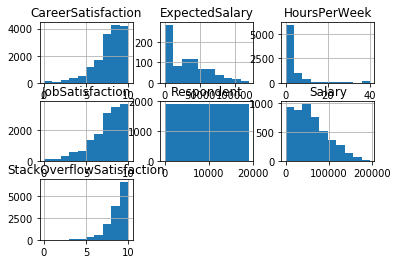

In [10]:
# Visualize the numerical columns
df.hist();

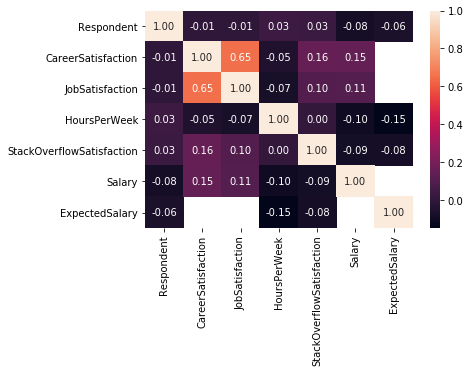

In [11]:
# This method is adopted from:
'''
***************************************************************************************/
*    Title: Salary.ipynb source code
*    Author: Udacity "Introduction to Data Science"
*    Date: 2022
*    Code version: N/A
*    Availability: ttps://learn.udacity.com/nanodegrees/nd025/parts/cd0017/lessons/5154784e-0258-4f49-8aa1-239fc6311969/concepts/e6f05cf1-62cb-40ac-b3b1-ad6cb1788e1c
*
***************************************************************************************/
'''

sns.heatmap(df.corr(), annot=True, fmt=".2f");

# Evaluation

### Question 1
#### What makes one be satisfied with own career? Does career satisfaction linked to a country where happiness is the highest (according to some other surveys, the happiest people live in Finland).

https://en.wikipedia.org/wiki/World_Happiness_Report#:~:text=Finland%20is%20in%20the%20top,in%20the%20world%20%5B1%5D.


#### Analyze 

In [12]:
# Consider a subset of the data frame that has Career Satisfaction NOT missing: 
df_career = df[df['CareerSatisfaction'].isnull()==False]
df_career.shape

(16102, 154)

In [13]:
df1= df_career[['CareerSatisfaction']]
df1.describe()

,CareerSatisfaction
count,16102.000000
mean,7.343932
std,1.919330
min,0.000000
25%,6.000000
50%,8.000000
75%,9.000000
max,10.000000


In [14]:
# Let's see how Finland is ranked among other countries 
 
df2 = df_career[df_career['Country'] == 'Finland']
df2['CareerSatisfaction'].mean()/df1['CareerSatisfaction'].mean()

0.99779391511703963

#### Visualize

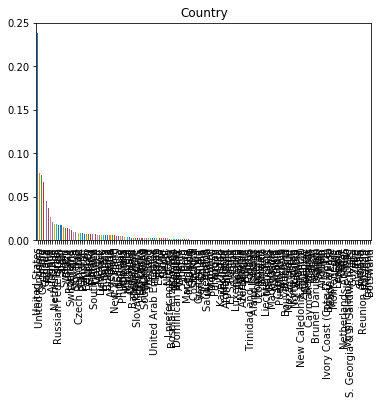

In [15]:
# What are some other countries with high career satisfaction?
df3 = df_career['Country']
countries = df3.value_counts() 
(countries/df_career.shape[0]).plot(kind="bar");
plt.title("Country");

In [16]:
# That plot above is hard to read - let's change use some descriptive statistics to select countries with 
# the highest career satisfaction  
df_means = df_career.groupby('Country')['CareerSatisfaction'].mean().reset_index(name='Career Satisfaction')

df_means_9 = df_means[df_means['Career Satisfaction']> 9]
df_means_9.sort_values(by=['Career Satisfaction'], ascending=False)


,Country,Career Satisfaction
5,Angola,10.0
6,Anguilla,10.0
46,Fiji,10.0
66,Iraq,10.0
78,Laos,10.0
153,Virgin Islands (USA),10.0
102,New Caledonia (French),9.5


#### Brief explanation

The assumption that the arguably the happiest country in the world (Finland) per https://en.wikipedia.org/wiki/World_Happiness_Report#:~:text=Finland%20is%20in%20the%20top,in%20the%20world%20%5B1%5D did not materialize.

It appears that career satisfaction in Finland is pretty close to the mean across all the countries - 99.8% match.
It does not stand out to reflect the highest ranking of happiness in this country overall.

However, this negative result has also its value. As I cannot drive a conclusion at this point, more research is required on the subject.


### Question 2
#### Does career satisfaction correlate with the current job satisfaction and salary? Is salary (compared to the mean within an individual’s country) the leading factor for an individual’s career satisfaction (one would expect this is the case)?

#### Analyze 

In [17]:
#Let's now take a closer look at the CareerSatisfaction value distribution  
df_career_rate = df['CareerSatisfaction'].value_counts().reset_index()
df_career_rate

,index,CareerSatisfaction
0,8.0,4247
1,7.0,3624
2,9.0,2127
3,10.0,2053
4,6.0,1684
5,5.0,1132
6,4.0,481
7,3.0,376
8,2.0,177
9,0.0,136


#### Visualize

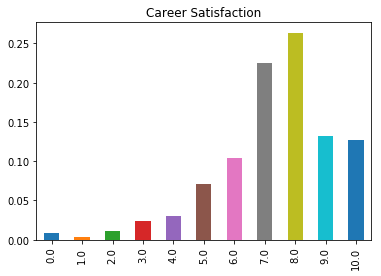

In [18]:
# and visualize this report while sorting by Career Satisfaction ascending:
df_copy = df_career.copy()
df_copy.filter(regex = 'CareerSatisfaction', axis=1)

carrer_count = df_career["CareerSatisfaction"].value_counts().sort_index()

(carrer_count/df_career.shape[0]).plot(kind="bar");
plt.title("Career Satisfaction");



In [19]:
# Does career satisfaction correlate with the current job satisfaction and salary? 

df_4ml = df_career[['CareerSatisfaction', 'Salary', 'JobSatisfaction']]

## Calculate the mean function to keep code DRY:
swap_mean = lambda col: col.fillna(col.mean())

df_mean = df_4ml.apply(swap_mean, axis=0)

# Explanatory variables:
X = df_mean[['Salary', 'JobSatisfaction']]
# Response variables:
y = df_mean['CareerSatisfaction']

# Design the model:
# Test size .33 (1/3) and random_state=42 will be used. Note: 42 is not a special number for random_state
# Read: https://medium.com/mlearning-ai/what-the-heck-is-random-state-24a7a8389f3d

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=42) 

# Instantiate the model
lm_model = LinearRegression(normalize=True)

# Fit the model
lm_model.fit(X_train, y_train)
        
# Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using selected variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using selected variables was 0.3763058736730457 on 5314 values.'

r-squared value between 0.3 and 0.5 is moderate, this regression model (the goodness of fit) is obviosly is not very strong

In [20]:
# Let's modify the explanatory variables

# Explanatory variables:
X = df_mean[['JobSatisfaction']]
# Respnse variables:
y = df_mean['CareerSatisfaction']


# Design the model:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=42) 

# Instantiate the model
lm_model = LinearRegression(normalize=True)

# Fit the model
lm_model.fit(X_train, y_train)
        
# Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using selected variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using selected variables was 0.3757014927750387 on 5314 values.'

still not a strong correlation, r-squared value is moderate

In [21]:
# Could Salary alone be the answer? 

# Explanatory variables:
X = df_mean[['Salary']]
# Response variables:
y = df_mean['CareerSatisfaction']

# Design the model:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=42) 

# Instantiate the model
lm_model = LinearRegression(normalize=True)

# Fit the model
lm_model.fit(X_train, y_train)
        
# Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using selected variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using selected variables was 0.004397456868138638 on 5314 values.'

Not good corelation at all based on Salary alone... what next?

In [22]:
# Next, let's assess Salary normed to its mean per country - will it give us better correlation?
# How does the data look like?

df_drop_sal= df_career.dropna(subset=['Salary'], axis=0)
df_mean_sal = df_drop_sal.groupby('Country')['Salary'].mean().rename('CountryMeanSalary').sort_values().reset_index()
df_mean_sal.head()

,Country,CountryMeanSalary
0,Ghana,574.000000
1,Zimbabwe,700.000000
2,Morocco,860.215054
3,Paraguay,1225.000000
4,Azerbaidjan,3500.000000


In [23]:
df_drop_sal = df_drop_sal.merge(df_mean_sal,on='Country',how="left")
df_drop_sal.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,CountryMeanSalary
0,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,54973.009331
1,15,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics...,All or almost all the time (I'm full-time remote),"5,000 to 9,999 employees",...,Male,High school,White or of European descent,Somewhat agree,Agree,Disagree,Agree,100000.0,NaN,54973.009331
2,18,Professional developer,"Yes, both",United States,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),"1,000 to 4,999 employees",...,Male,A master's degree,"Native American, Pacific Islander, or Indigeno...",Disagree,Agree,Disagree,Agree,130000.0,NaN,98689.115044
3,19,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,"10,000 or more employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82500.0,NaN,98689.115044
4,23,Professional developer,No,Israel,No,Employed full-time,Bachelor's degree,Computer engineering or electrical/electronics...,A few days each month,500 to 999 employees,...,Male,A bachelor's degree,White or of European descent,Strongly agree,Somewhat agree,Somewhat agree,Agree,100764.0,NaN,63330.247259


In [24]:
# Norm salary of each individual to the mean in the given country 
df_drop_sal['SalaryNorm'] = (df_drop_sal['Salary'] / df_drop_sal['CountryMeanSalary'])
df_drop_sal.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,CountryMeanSalary,SalaryNorm
0,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,54973.009331,2.069197
1,15,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics...,All or almost all the time (I'm full-time remote),"5,000 to 9,999 employees",...,High school,White or of European descent,Somewhat agree,Agree,Disagree,Agree,100000.0,NaN,54973.009331,1.819075
2,18,Professional developer,"Yes, both",United States,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),"1,000 to 4,999 employees",...,A master's degree,"Native American, Pacific Islander, or Indigeno...",Disagree,Agree,Disagree,Agree,130000.0,NaN,98689.115044,1.317268
3,19,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,"10,000 or more employees",...,NaN,NaN,NaN,NaN,NaN,NaN,82500.0,NaN,98689.115044,0.835958
4,23,Professional developer,No,Israel,No,Employed full-time,Bachelor's degree,Computer engineering or electrical/electronics...,A few days each month,500 to 999 employees,...,A bachelor's degree,White or of European descent,Strongly agree,Somewhat agree,Somewhat agree,Agree,100764.0,NaN,63330.247259,1.591088


In [25]:
# Assess this simplified model for normed salaries: 

# Explanatory variables:
X = df_drop_sal[['SalaryNorm']]
# Response variables:
y = df_drop_sal['CareerSatisfaction']

# Design train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=42) 

# Instantiate the model
lm_model = LinearRegression(normalize=True)
# Fit the model
lm_model.fit(X_train, y_train)
        
# Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using selected variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using selected variables was 0.006521159545815225 on 1650 values.'

This is a big surprise - very low correlation between Career Satisfactin and Salary Norm.

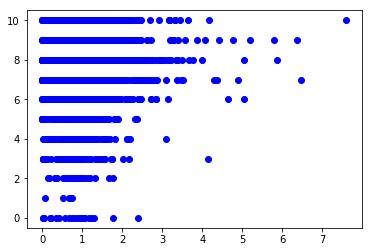

In [26]:
plt.plot(X, y, 'o', color='blue')

#### Brief explanation

The outcome of this analysis provides a valuable insight - career satisfaction does not correlate with an individual’s  salary normed to the country mean.  


### Question 3
#### How does career satisfaction relate to the formal degree? How well can we predict career satisfaction based on other data related to education and salary of an individual?

#### Analyze 

In [27]:
# We'll leverge th already groomed subset of data from "Question 2" section
# We'll narrow down to the colums of focus of this use case
# This will likely avoid overfitting vs using the entire data set with a large number or cartegorical columns 
df_drop_sal= df_drop_sal.dropna(subset=['JobSatisfaction'], axis=0).reset_index()
df_career_short = df_drop_sal[['CareerSatisfaction', 'SalaryNorm', 'JobSatisfaction','FormalEducation', 'EducationImportant', 'HighestEducationParents']]
cat_df = df_career_short.select_dtypes(include=['object']).copy()
cat_cols = cat_df.columns
cat_cols

Index(['FormalEducation', 'EducationImportant', 'HighestEducationParents'], dtype='object')

In [28]:
# Next, we'll build a model leveraging the approach of Udacity course work:
'''
***************************************************************************************/
*    Title: Categorical Variables.ipynb source code
*    Author: Udacity "Introduction to Data Science"
*    Date: 2022
*    Code version: N/A
*    Availability: ttps://learn.udacity.com/nanodegrees/nd025/parts/cd0017/lessons/5154784e-0258-4f49-8aa1-239fc6311969/concepts/e6f05cf1-62cb-40ac-b3b1-ad6cb1788e1c
*
***************************************************************************************/
'''

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
        contains all columns that were not specified as categorical
        dummy columns for each of the categorical columns in cat_cols
        if dummy_na is True - it also contains dummy columns for the NaN values
        uses a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each categorical add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [29]:
df_4ml = create_dummy_df(df_career_short, cat_cols, dummy_na=False)

In [30]:
df_4ml.head()

,CareerSatisfaction,SalaryNorm,JobSatisfaction,FormalEducation_Doctoral degree,FormalEducation_I never completed any formal education,FormalEducation_I prefer not to answer,FormalEducation_Master's degree,FormalEducation_Primary/elementary school,FormalEducation_Professional degree,FormalEducation_Secondary school,...,EducationImportant_Very important,HighestEducationParents_A doctoral degree,HighestEducationParents_A master's degree,HighestEducationParents_A professional degree,HighestEducationParents_High school,HighestEducationParents_I don't know/not sure,HighestEducationParents_I prefer not to answer,HighestEducationParents_No education,HighestEducationParents_Primary/elementary school,"HighestEducationParents_Some college/university study, no bachelor's degree"
0,8.0,2.069197,9.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,8.0,1.819075,8.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,9.0,1.317268,8.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,5.0,0.835958,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.0,1.591088,9.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_4ml.describe()

,CareerSatisfaction,SalaryNorm,JobSatisfaction,FormalEducation_Doctoral degree,FormalEducation_I never completed any formal education,FormalEducation_I prefer not to answer,FormalEducation_Master's degree,FormalEducation_Primary/elementary school,FormalEducation_Professional degree,FormalEducation_Secondary school,...,EducationImportant_Very important,HighestEducationParents_A doctoral degree,HighestEducationParents_A master's degree,HighestEducationParents_A professional degree,HighestEducationParents_High school,HighestEducationParents_I don't know/not sure,HighestEducationParents_I prefer not to answer,HighestEducationParents_No education,HighestEducationParents_Primary/elementary school,"HighestEducationParents_Some college/university study, no bachelor's degree"
count,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,...,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000
mean,7.536058,0.999921,7.025641,0.026843,0.004207,0.003405,0.235777,0.003806,0.010817,0.063502,...,0.110377,0.046875,0.201522,0.041667,0.167067,0.013622,0.004407,0.004607,0.033654,0.123998
std,1.704445,0.575399,2.064319,0.161640,0.064729,0.058263,0.424526,0.061582,0.103453,0.243887,...,0.313390,0.211392,0.401177,0.199846,0.373073,0.115926,0.066246,0.067728,0.180355,0.329613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.669142,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,0.951202,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,1.252674,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,7.599665,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# Train and test the model - all in one by leveraging Udacity course work:
'''
***************************************************************************************/
*    Title: Categorical Variables.ipynb source code
*    Author: Udacity "Introduction to Data Science"
*    Date: 2022
*    Code version: N/A
*    Availability: ttps://learn.udacity.com/nanodegrees/nd025/parts/cd0017/lessons/5154784e-0258-4f49-8aa1-239fc6311969/concepts/e6f05cf1-62cb-40ac-b3b1-ad6cb1788e1c
*
***************************************************************************************/
'''

def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''

    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    # Explanatory variables
    X = df.drop(response_col, axis=1)
    # Response variables
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_4ml, 'CareerSatisfaction', cat_cols, dummy_na=False)

In [33]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.38190662589927515.  The rsquared on the test data was 0.3432834826387886.


In [34]:
# Assess weights of the model 
df_weights = pd.DataFrame()
df_weights['X_train.columns'] = X_train.columns
df_weights['lm_model.coef_'] = lm_model.coef_
df_weights['|lm_model.coef_|'] = np.abs(lm_model.coef_)
df_weights = df_weights.sort_values('|lm_model.coef_|', ascending=False) #highest first 
df_weights

,X_train.columns,lm_model.coef_,|lm_model.coef_|
3,FormalEducation_I never completed any formal e...,0.783309,0.783309
4,FormalEducation_I prefer not to answer,0.685760,0.685760
1,JobSatisfaction,0.496788,0.496788
20,HighestEducationParents_No education,0.433180,0.433180
7,FormalEducation_Professional degree,-0.376145,0.376145
18,HighestEducationParents_I don't know/not sure,-0.258184,0.258184
21,HighestEducationParents_Primary/elementary school,-0.250433,0.250433
6,FormalEducation_Primary/elementary school,0.189936,0.189936
2,FormalEducation_Doctoral degree,-0.181995,0.181995
0,SalaryNorm,0.158998,0.158998


It appears that career satisfaction of the respondents correlates with their or their parents' absence of formal education! In addition to these 2 factors, job satisfaction demonstrates one of the highest weights “|lm_model.coef_|”  in the model as shown in the figure that outlines the top 10 absolute coefficients “X_train_columns”:

#### Visualize

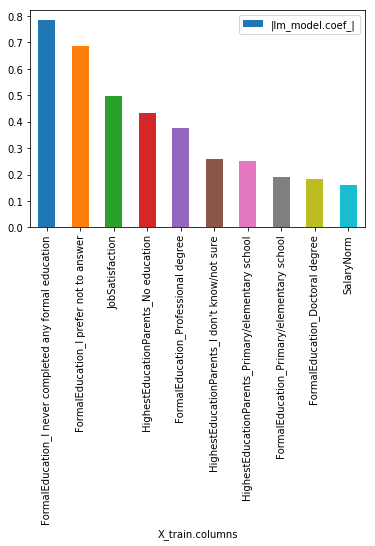

In [35]:
df_weights.head(10).plot(x ='X_train.columns', y='|lm_model.coef_|', kind='bar')

#### Brief explanation
Interestingly enough, it appears that career satisfaction on those in the programming field correlates with absence of formal education of respondents and their parents as well as their job satisfaction which demostrate the highest weights in the selected model.